# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# **DATA**

In [2]:
# Membaca data
data = pd.read_csv("Most Subscribed YouTube Channels_exported.csv")
# Menampilkan jumlah baris dan kolom
print(data.shape)

(50, 6)


# **EXPLORATORY DATA ANALYSIS**

In [3]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


In [4]:
# Menampilkan data awal
data.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States


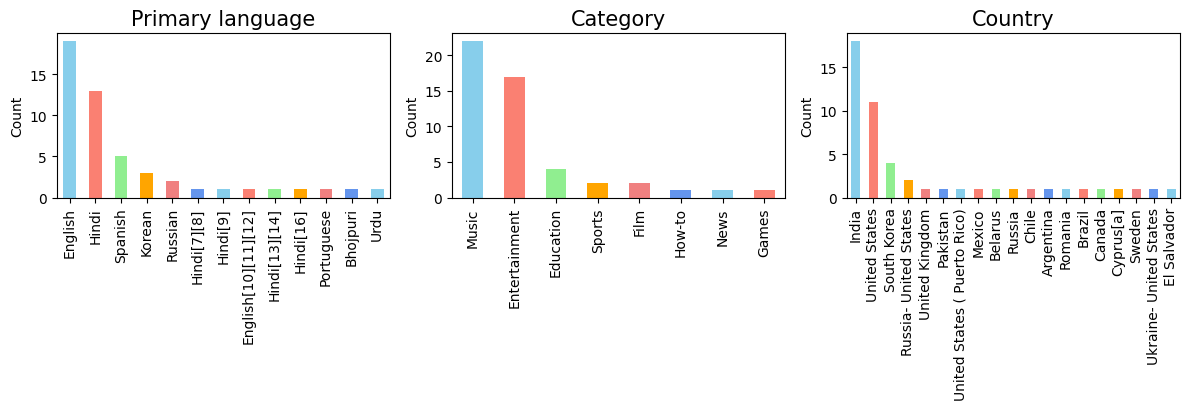

In [5]:
# Kolom Primary Language, Category, dan Country
kolom_kategorik = ['Primary language', 'Category', 'Country']
# Daftar warna plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue']
plt.figure(figsize=(12, 6))
# Looping for untuk mendapatkan indeks fitur dengan nilai kolomnya
for i, column in enumerate(kolom_kategorik):
    plt.subplot(2, 3, i + 1)
    # Membuat diagram batang
    data[column].value_counts().plot(kind='bar', color=colors, fontsize = 10)
    plt.title(column, fontsize=15)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.tight_layout()

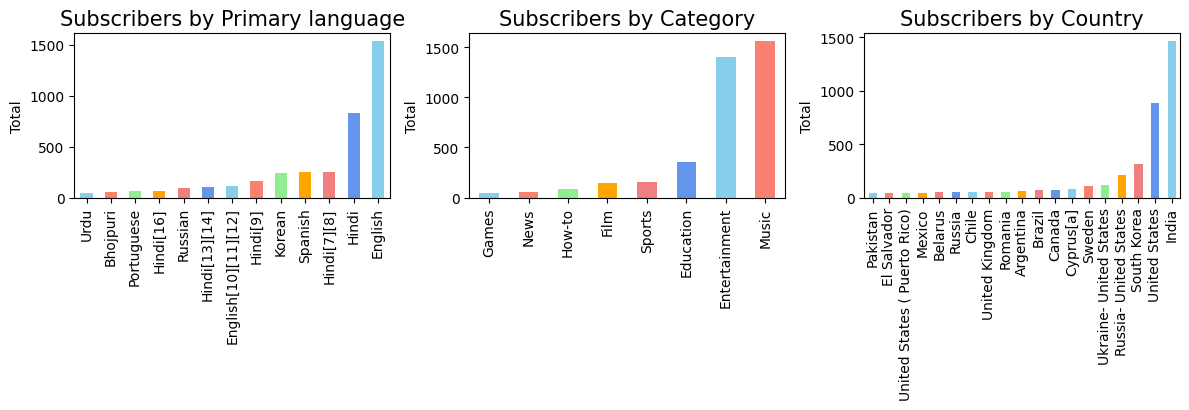

In [6]:
# Kolom Primary Language, Category, dan Country
kolom = ['Primary language', 'Category', 'Country']
# Daftar warna plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue']

# Ukuran plot
plt.figure(figsize=(12, 6))

# Looping untuk menampilkan diagram
for i, column in enumerate(kolom):
    plt.subplot(2, 3, i + 1)
    data.groupby(column)['Subscribers (millions)'].sum().sort_values().plot(kind='bar', color=colors, fontsize = 10)
    plt.title(f'Subscribers by {column}', fontsize=15)
    plt.xlabel('')
    plt.ylabel('Total')
    plt.tight_layout()

plt.show()

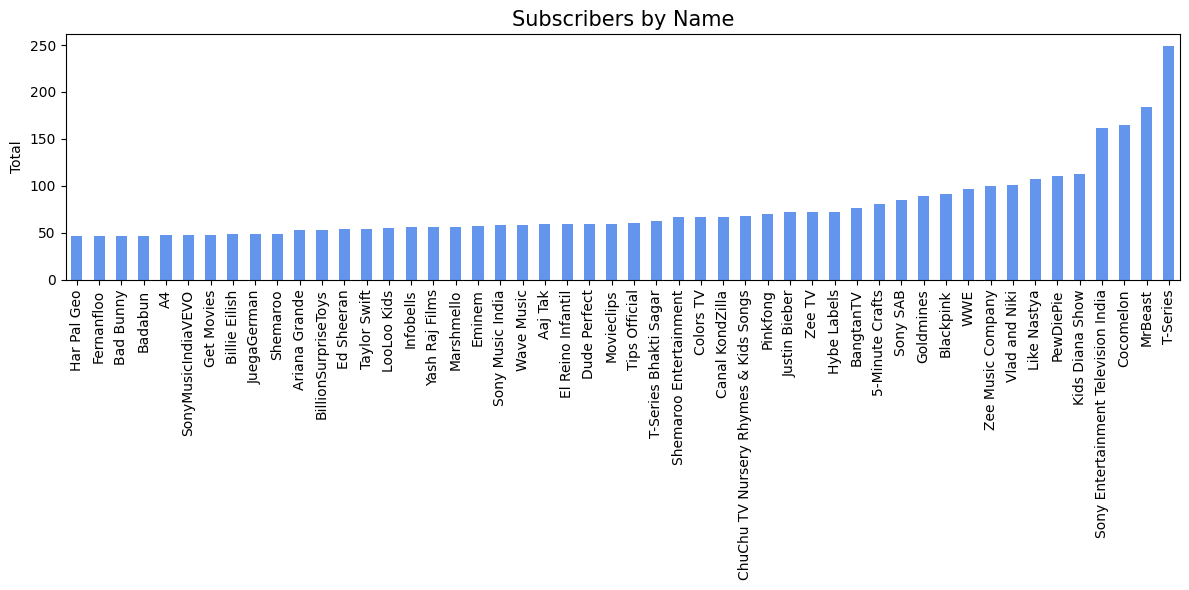

In [7]:
# Kolom Name
kolom = ['Name']
colors = ['cornflowerblue']

plt.figure(figsize=(12, 6))
for i, column in enumerate(kolom):
    data.groupby(column)['Subscribers (millions)'].sum().sort_values().plot(kind='bar', color=colors, fontsize = 10)
    plt.title(f'Subscribers by {column}', fontsize=15)
    plt.xlabel('')
    plt.ylabel('Total')
    plt.tight_layout()

plt.show()

# **DATA PREPROCESSING**

In [8]:
# Memeriksa jumlah missing value di setiap kolom
missing_values = data.isnull().sum()
print(missing_values)

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64


In [9]:
# Membersihkan data pada kolom "Primary language" dan "Country"
# Menghapus angka dalam tanda siku dan spasi tambahan
data['Primary language'] = data['Primary language'].apply(lambda x: re.sub(r'\[\d+\]', '', x).strip())
# Menghapus teks dalam tanda kurung
data['Country'] = data['Country'].apply(lambda x: re.sub(r'\s*\(.*\)', '', x))
# Menghapus karakter khusus selain huruf dan spasi
data['Country'] = data['Country'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# Menghapus spasi tambahan di awal dan akhir
data['Country'] = data['Country'].str.strip()

# Menampilkan data unik setelah membersihkan
print(data['Primary language'].unique())
print(data['Country'].unique())

['Hindi' 'English' 'Korean' 'Portuguese' 'Spanish' 'Bhojpuri' 'Russian'
 'Urdu']
['India' 'United States' 'Ukraine\xa0United States' 'Sweden'
 'Russia\xa0United States' 'South Korea' 'Cyprusa' 'Canada' 'Brazil'
 'Argentina' 'Romania' 'United Kingdom' 'Chile' 'Russia' 'Belarus'
 'Mexico' 'Pakistan' 'El Salvador']


In [10]:
# Menyimpan data yang sudah dibersihkan dalam format Excel
data.to_excel('Most Subscribed YouTube Channel.xlsx', index=False)

# Menyimpan data yang sudah dibersihkan dalam format CSV
data.to_csv('Most Subscribed YouTube Channel.csv', index=False)

In [11]:
data.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi,Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi,Entertainment,India
4,Kids Diana Show,Yes,113.0,English,Entertainment,Ukraine United States
